In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import rdchiral.main as rdc
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from tqdm import tqdm
import matplotlib.pyplot as plt

from falsify_data import removemap
from utils import *

In [3]:
def drawRxn(rxn, size=(800, 300), fileName='reaction.png'):
    rxn = AllChem.ReactionFromSmarts(rxn)
    d2d = Draw.MolDraw2DCairo(*size)
    d2d.DrawReaction(rxn)
    d2d.GetDrawingText()
    png = d2d.GetDrawingText()
    open(os.path.join('figures', fileName), 'wb+').write(png)

# METHOD 1 - STRICT

In [2]:
neg_1 = pd.read_csv('negative_strict.csv')
neg_1

,rxn_smiles,label,true_rxn_smiles,forward_template
0,BrCc1ccccc1.Oc1ccc(O)c(Br)c1>>Oc1ccc(OCc2ccccc...,0,BrCc1ccccc1.Oc1ccc(O)c(Br)c1>>Oc1ccc(OCc2ccccc...,(Br-[CH2;D2;+0:1]-[c:2].[OH;D1;+0:3]-[c:4])>>(...
1,CC(C)(C)OC(=O)NCC1CCNCC1.O=S(=O)(Cl)c1cccc2cnc...,0,CC(C)(C)OC(=O)NCC1CCNCC1.O=S(=O)(Cl)c1cccc2cnc...,(Cl-[S;H0;D4;+0:1](=[O;D1;H0:2])(=[O;D1;H0:3])...
2,CCSc1nc(Cl)cc(C)c1C(=O)NCc1cccc(F)c1.OC[C@H]1C...,0,CCSc1nc(Cl)cc(C)c1C(=O)NCc1cccc(F)c1.OC[C@H]1C...,(Cl-[c;H0;D3;+0:1](:[#7;a:2]):[c:3].[C:4]-[NH;...
3,NCC1(O)CCCC1.O=[N+]([O-])c1cc(Br)ccc1Br>>O=[N+...,0,NCC1(O)CCCC1.O=[N+]([O-])c1cc(Br)ccc1Br>>O=[N+...,(Br-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[NH2;D1...
4,CCNCC1CCNC1.CCn1cc(C(=O)O)c(=O)c2cc(F)c(Cl)nc2...,0,CCNCC1CCNC1.CCn1cc(C(=O)O)c(=O)c2cc(F)c(Cl)nc2...,(Cl-[c;H0;D3;+0:1](:[c:2]):[#7;a:3]:[c:4]:[#7;...
...,...,...,...,...
2114,CS(=O)(=O)c1ccc(C=O)cc1.Nc1ccc(-c2c(N)nc(N)nc2...,0,CS(=O)(=O)c1ccc(C=O)cc1.Nc1ccc(-c2c(N)nc(N)nc2...,(O=[CH;D2;+0:1]-[c:2].[NH2;D1;+0:3]-[c:4])>>([...
2115,O=C(O)Cc1cccc2ccccc12.OCCOCCO>>O=C(Cc1cccc2ccc...,0,O=C(O)Cc1cccc2ccccc12.OCCOCCO>>O=C(Cc1cccc2ccc...,(O-[CH2;D2;+0:1]-[C:2].[O;D1;H0:3]=[C:4]-[OH;D...
2116,COc1cc(Cl)c(-c2ccc(Cl)cc2)cc1C(=O)O.N#CC1CNCCN...,0,COc1cc(Cl)c(-c2ccc(Cl)cc2)cc1C(=O)O.N#CC1CNCCN...,(O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[C:4]-[N...
2117,C=CC[C@@H](CC(=O)OC(C)(C)C)C(=O)O.OC[C@@H]1CCC...,0,C=CC[C@@H](CC(=O)OC(C)(C)C)C(=O)O.OC[C@@H]1CCC...,(O-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3].[C:4]-[N...


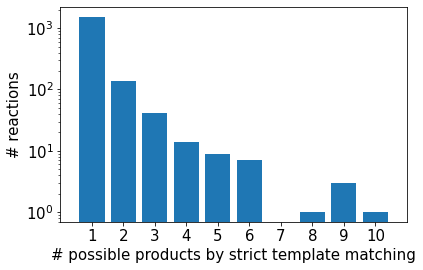

In [120]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.hist(neg_1.groupby('true_rxn_smiles').size(), bins=np.arange(12)-0.5, rwidth=0.8)
plt.xlim(0, 11)
plt.xticks(np.arange(1, 11))
plt.xlabel('# possible products by strict template matching')
plt.ylabel('# reactions')
plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/strict_hist.png', dpi=300)

In [25]:
df = neg_1[neg_1['true_rxn_smiles'] == 'BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=O)c2ccc(OCCBr)cc2)cc1'].reset_index(drop=True)
df

,rxn_smiles,label,true_rxn_smiles,forward_template
0,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=...,0,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=...,(Cl-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[c:4]:[...
1,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=...,0,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=...,(Cl-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[c:4]:[...
2,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc2cc1...,0,BrCCOc1ccccc1.COc1ccc(C(=O)Cl)cc1>>COc1ccc(C(=...,(Cl-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[c:4]:[...


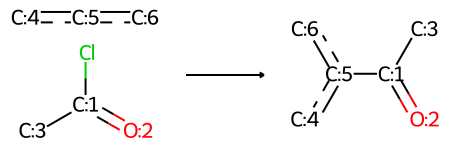

In [58]:
drawRxn(df.loc[0, 'forward_template'], fileName='strict_template.png')
AllChem.ReactionFromSmarts(df.loc[0, 'forward_template'])

((4, 5, 6), (4, 9, 8), (5, 4, 9), (5, 6, 7), (6, 7, 8), (7, 8, 9))


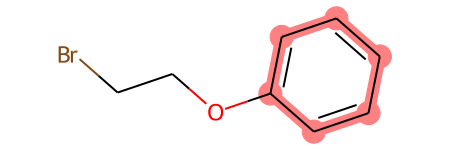

In [98]:
m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[0].split('.')[0])
sub = Chem.MolFromSmarts('c:c:c')
print(m.GetSubstructMatches(sub))
m

((8, 6, 7, 5),)


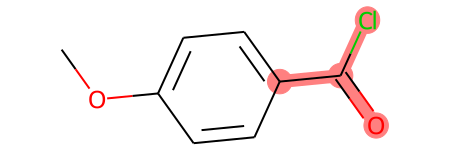

In [102]:
m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[0].split('.')[1])
sub = Chem.MolFromSmarts('ClC(=O)c')
print(m.GetSubstructMatches(sub))
m

In [110]:
m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'true_rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/strict_pt_0.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/strict_pt_1.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[1, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/strict_pt_2.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[2, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/strict_pt_3.png')

# METHOD 2 - RANDOM

In [6]:
neg_2 = pd.read_csv('negative_random_comprehensive.csv')
rt_list = []
for rxn in neg_2['rxn_smiles']:
    rt, _ = rxn2rtpt(rxn)
    # sort reactants in a uniform order
    rt_list.append('.'.join(sorted(rt.split('.'))))
neg_2['rt'] = rt_list
neg_2

,rxn_smiles,label,true_rxn_smiles,forward_template,rt
0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
1,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
2,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
3,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
4,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
...,...,...,...,...,...
360329,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,0,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1
360330,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,0,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1
360331,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,0,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1
360332,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,0,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1


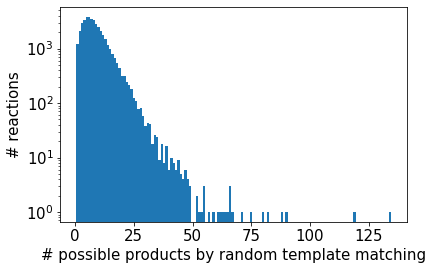

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.hist(neg_2.groupby('rt').size(), rwidth=1, bins=np.arange(135)+0.5)
# plt.xlim(0, 11)
# plt.xticks(np.arange(1, 11))
plt.xlabel('# possible products by random template matching')
plt.ylabel('# reactions')
plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/random_hist.png', dpi=300)

In [35]:
neg_2.groupby('rt').size()[neg_2.groupby('rt').size() >= 3][:10]

rt
Br.C=C(CCCN1C(=O)c2ccccc2C1=O)C(=O)O                                       7
Br.C=CCCC(=O)C(C)(C)N1COC(C)=C(c2ccccc2)C1=O                               7
Br.CCOC(=O)C(C)(C)CCC=Cc1ccccc1Cl                                          7
BrC#Cc1ccccc1.C#CC(C)(C)O                                                  3
BrC(Br)(Br)Br.CC(=O)OCc1ccc(Cl)cc1N([C@H](C)CCCO)S(=O)(=O)c1ccc(Cl)cc1    12
BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(CO)CC1                                   7
BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1                                    7
BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC2(CC1)CC(O)C2                             7
BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCCC1c1oc(=O)oc1CO                           7
BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCO[C@H](CO)C1                              11
dtype: int64

In [40]:
df = neg_2[neg_2['rt'] == 'BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1'].reset_index(drop=True)
df

,rxn_smiles,label,true_rxn_smiles,forward_template,rt
0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
1,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>O=C(O...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
2,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>OC1CC...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
3,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
4,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>OC1CC...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
5,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1
6,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,0,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1>>CC(C)...,(Br-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]:[#7;a:4])>...,BrC(Br)(Br)Br.CC(C)(C)OC(=O)N1CCC(O)CC1


In [63]:
m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[0].split('.')[0])
img = Draw.MolToImage(m)
img.save('figures/random_rt_1.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[0].split('.')[1])
img = Draw.MolToImage(m)
img.save('figures/random_rt_2.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'true_rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_0.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[0, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_1.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[1, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_2.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[2, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_3.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[3, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_4.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[4, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_5.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[5, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_6.png')

m = Chem.MolFromSmiles(rxn2rtpt(df.loc[6, 'rxn_smiles'])[1])
img = Draw.MolToImage(m)
img.save('figures/random_pt_7.png')

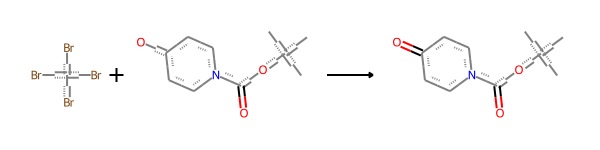

In [41]:
AllChem.ReactionFromSmarts(df.loc[0, 'rxn_smiles'])

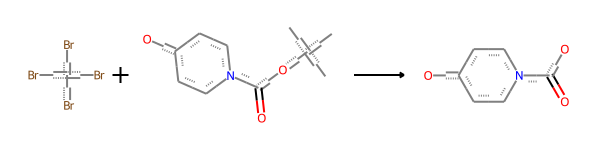

In [45]:
AllChem.ReactionFromSmarts(df.loc[1, 'rxn_smiles'])

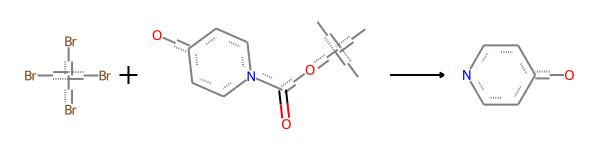

In [46]:
AllChem.ReactionFromSmarts(df.loc[2, 'rxn_smiles'])